Обучение с подкреплением - модель взаимодействует с внешней средой

Практика 1. Обучение с учителем
Функция активации управляет значением выхода нейрона
Сигмоида: смещение и наклон перепада

1) Инициализация параметров начальными значениями
2) Итерактивный проход по алгоритму обучения - эпоха
3) Функция потерь. В данном случае - MSE
Цель: в процессе обучения снизить ошибку

вес_новый = вес_старый + дельта
ошибка = y_реал - y_модель

график изменения весов от кол-ва эпох обучения

In [ ]:
!apt-get install graphviz -y
!pip install pydot graphviz

In [10]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
model = tf.keras.Sequential([
    keras.layers.Dense(units=1, input_shape=[1])
])
model.compile(optimizer='sgd', loss='mean_squared_error')
# -x + 1
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([2.0, 1.0, 0.0, -1.0, -4.0, -3.0], dtype=float)


class GetWeights(tf.keras.callbacks.Callback):
    def __init__(self):
        super(GetWeights, self).__init__()
        self.weight_dict = {}
        self.epoch_weights = []
        self.epoch_biases = []

    def on_epoch_end(self, epoch, logs=None):
        for layer_i in range(len(self.model.layers)):
            w = self.model.layers[layer_i].get_weights()[0]
            b = self.model.layers[layer_i].get_weights()[1]
            print('Layer %s has weights of shape %s and biases of shape %s' % (
                layer_i, np.shape(w), np.shape(b)))
            print('слой %s коф. %s и смещение %s' % (
                layer_i, w, b))

            self.epoch_weights.append(w[0][0])
            self.epoch_biases.append(b[0])

            if epoch == 0:
                self.weight_dict['w_' + str(layer_i + 1)] = w
                self.weight_dict['b_' + str(layer_i + 1)] = b
            else:
                self.weight_dict['w_' + str(layer_i + 1)] = np.dstack(
                    (self.weight_dict['w_' + str(layer_i + 1)], w))
                self.weight_dict['b_' + str(layer_i + 1)] = np.dstack(
                    (self.weight_dict['b_' + str(layer_i + 1)], b))

In [11]:
gw = GetWeights()
history = model.fit(xs, ys, epochs=30, callbacks=[gw])

Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step - loss: 4.3463Layer 0 has weights of shape (1, 1) and biases of shape (1,)
слой 0 коф. [[-1.6300461]] и смещение [0.03474752]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step - loss: 4.3463
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 3.5702Layer 0 has weights of shape (1, 1) and biases of shape (1,)
слой 0 коф. [[-1.5559838]] и смещение [0.06628729]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 3.5702
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 2.9585Layer 0 has weights of shape (1, 1) and biases of shape (1,)
слой 0 коф. [[-1.4905207]] и смещение [0.09497438]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 2.9585
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 2.4763Layer 0 has weights of shape (1, 1) and biases of shape (1,)
слой 0 коф. [[-1.4326828]] и смещение [0.12112385]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 2.4763
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 2.0959Layer 0 has weights of 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


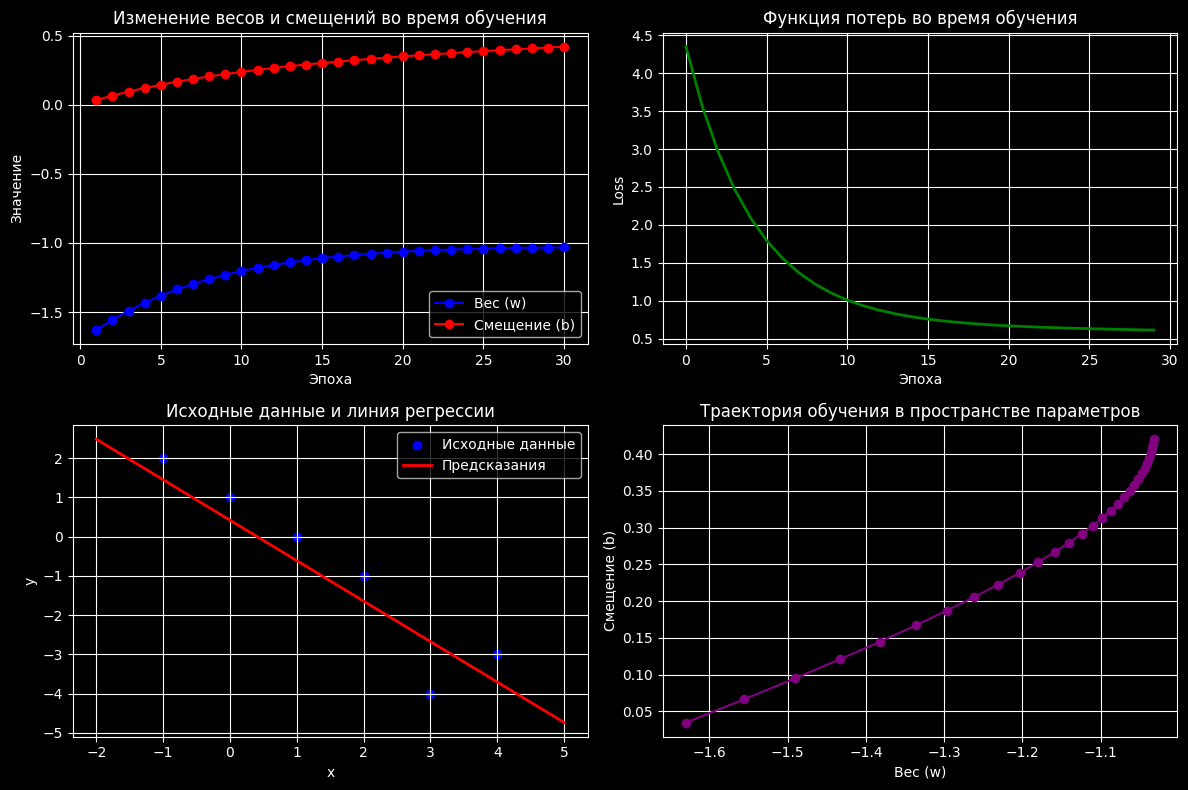

In [12]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
epochs = range(1, len(gw.epoch_weights) + 1)
plt.plot(epochs, gw.epoch_weights, 'bo-', label='Вес (w)')
plt.plot(epochs, gw.epoch_biases, 'ro-', label='Смещение (b)')
plt.title('Изменение весов и смещений во время обучения')
plt.xlabel('Эпоха')
plt.ylabel('Значение')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(history.history['loss'], 'g-', linewidth=2)
plt.title('Функция потерь во время обучения')
plt.xlabel('Эпоха')
plt.ylabel('Loss')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.scatter(xs, ys, color='blue', label='Исходные данные')
x_range = np.linspace(min(xs) - 1, max(xs) + 1, 100)
y_pred = model.predict(x_range.reshape(-1, 1))
plt.plot(x_range, y_pred, color='red', linewidth=2, label='Предсказания')
plt.title('Исходные данные и линия регрессии')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(gw.epoch_weights, gw.epoch_biases, color='purple', marker='o', linestyle='-')
plt.title('Траектория обучения в пространстве параметров')
plt.xlabel('Вес (w)')
plt.ylabel('Смещение (b)')
plt.grid(True)

plt.tight_layout()
plt.show()

In [13]:
final_weights = model.layers[0].get_weights()[0][0][0]
final_bias = model.layers[0].get_weights()[1][0]

print(f"Model params:")
print(f"Weight (w): {final_weights:.4f}")
print(f"Bias (b): {final_bias:.4f}")
print(f"Line eq: y = {final_weights:.4f} * x + {final_bias:.4f}")

Model params:
Weight (w): -1.0320
Bias (b): 0.4202
Line eq: y = -1.0320 * x + 0.4202


In [14]:
print(f"Predict for x=0.1: {model.predict(np.array([[0.1]]))[0][0]:.4f}")
print("Weights history:")
for i, (w, b) in enumerate(zip(gw.epoch_weights, gw.epoch_biases)):
    print(f"Epoch {i + 1}: w = {w:.4f}, b = {b:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Predict for x=0.1: 0.3170
Weights history:
Epoch 1: w = -1.6300, b = 0.0347
Epoch 2: w = -1.5560, b = 0.0663
Epoch 3: w = -1.4905, b = 0.0950
Epoch 4: w = -1.4327, b = 0.1211
Epoch 5: w = -1.3816, b = 0.1450
Epoch 6: w = -1.3365, b = 0.1669
Epoch 7: w = -1.2968, b = 0.1870
Epoch 8: w = -1.2617, b = 0.2055
Epoch 9: w = -1.2308, b = 0.2226
Epoch 10: w = -1.2036, b = 0.2384
Epoch 11: w = -1.1798, b = 0.2530
Epoch 12: w = -1.1588, b = 0.2667
Epoch 13: w = -1.1404, b = 0.2795
Epoch 14: w = -1.1242, b = 0.2914
Epoch 15: w = -1.1102, b = 0.3027
Epoch 16: w = -1.0978, b = 0.3132
Epoch 17: w = -1.0871, b = 0.3232
Epoch 18: w = -1.0778, b = 0.3327
Epoch 19: w = -1.0698, b = 0.3417
Epoch 20: w = -1.0628, b = 0.3503
Epoch 21: w = -1.0568, b = 0.3585
Epoch 22: w = -1.0517, b = 0.3664
Epoch 23: w = -1.0474, b = 0.3740
Epoch 24: w = -1.0437, b = 0.3812
Epoch 25: w = -1.0406, b = 0.3883
Epoch 26: w = -1.0381, b = 0.3950
Epoch 27: w = -1.0360, b = 0.4016
Epoch 28: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


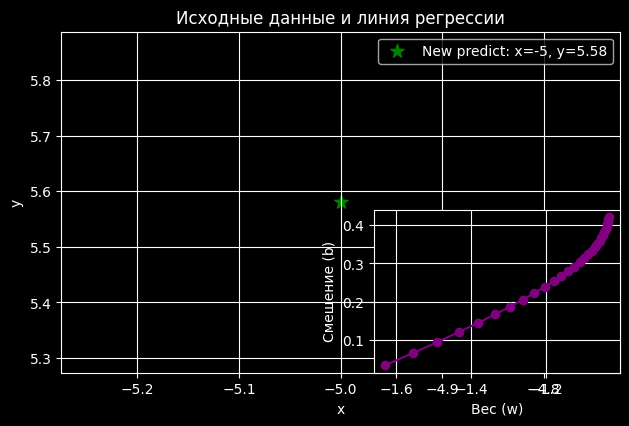


Финальные параметры модели:
Вес (w): -1.0320
Смещение (b): 0.4202
Уравнение: y = -1.0320 * x + 0.4202
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step

Predict for x=10: -9.9000
Epoch 1: w = -1.6300, b = 0.0347
Epoch 2: w = -1.5560, b = 0.0663
Epoch 3: w = -1.4905, b = 0.0950
Epoch 4: w = -1.4327, b = 0.1211
Epoch 5: w = -1.3816, b = 0.1450
Epoch 6: w = -1.3365, b = 0.1669
Epoch 7: w = -1.2968, b = 0.1870
Epoch 8: w = -1.2617, b = 0.2055
Epoch 9: w = -1.2308, b = 0.2226
Epoch 10: w = -1.2036, b = 0.2384
Epoch 11: w = -1.1798, b = 0.2530
Epoch 12: w = -1.1588, b = 0.2667
Epoch 13: w = -1.1404, b = 0.2795
Epoch 14: w = -1.1242, b = 0.2914
Epoch 15: w = -1.1102, b = 0.3027
Epoch 16: w = -1.0978, b = 0.3132
Epoch 17: w = -1.0871, b = 0.3232
Epoch 18: w = -1.0778, b = 0.3327
Epoch 19: w = -1.0698, b = 0.3417
Epoch 20: w = -1.0628, b = 0.3503
Epoch 21: w = -1.0568, b = 0.3585
Epoch 22: w = -1.0517, b = 0.3664
Epoch 23: w = -1.0474, b = 0.3740
Epoch 24: w = -1.0437, b = 0.3812
Epoch 25: w = -1.0406, b 

In [15]:
# Test
new_x = -5
new_y = model.predict(np.array([[new_x]]))[0][0]
plt.scatter([new_x], [new_y], color='green', s=100, marker='*',
            label=f'New predict: x={new_x}, y={new_y:.2f}')

plt.title('Исходные данные и линия регрессии')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(gw.epoch_weights, gw.epoch_biases, color='purple', marker='o', linestyle='-')
plt.xlabel('Вес (w)')
plt.ylabel('Смещение (b)')
plt.grid(True)

plt.tight_layout()
plt.show()

final_weights = model.layers[0].get_weights()[0][0][0]
final_bias = model.layers[0].get_weights()[1][0]
print(f"\nФинальные параметры модели:")
print(f"Вес (w): {final_weights:.4f}")
print(f"Смещение (b): {final_bias:.4f}")
print(f"Уравнение: y = {final_weights:.4f} * x + {final_bias:.4f}")

print(f"\nPredict for x=10: {model.predict(np.array([[10]]))[0][0]:.4f}")

for i, (w, b) in enumerate(zip(gw.epoch_weights, gw.epoch_biases)):
    print(f"Epoch {i + 1}: w = {w:.4f}, b = {b:.4f}")

print("\n" + "=" * 50)
print("predict for new X:")
print("=" * 50)

new_x_values = [-9.0, -8.0, 8.0, 9.0]

for x_new in new_x_values:
    y_pred = model.predict(np.array([[x_new]]))[0][0]
    print(f"x = {x_new:4.1f} -> y = {y_pred:6.2f} (предсказание)")

    y_ideal = -x_new + 1
    print(f"value: y = {y_ideal:6.2f}")
    print(f"error: {abs(y_pred - y_ideal):6.2f}")
    print("-" * 30)

print(f"\nx = {new_x}:")
print(f"model predictions: y = {final_weights:.4f} * {new_x} + {final_bias:.4f} = {new_y:.4f}")
print(f"value: y = -1 * ({new_x}) + 1 = {-new_x + 1:.4f}")

Плоскость
P = w1j*x1 + w2j*x2 + w0

Модифицировать программу
1. Задать датасет плоскости
2. x [ ] y [ ] z [ шум ]  

Epoch 1: w_x = 0.1106, w_y = -0.2991, b = -0.0007, loss = 401.7807
Epoch 2: w_x = 0.1136, w_y = -0.3021, b = -0.0007, loss = 400.7982
Epoch 3: w_x = 0.1165, w_y = -0.3050, b = -0.0004, loss = 399.8911
Epoch 4: w_x = 0.1195, w_y = -0.3080, b = -0.0008, loss = 398.8411
Epoch 5: w_x = 0.1224, w_y = -0.3109, b = -0.0007, loss = 397.9742
Epoch 6: w_x = 0.1253, w_y = -0.3137, b = -0.0007, loss = 396.9403
Epoch 7: w_x = 0.1283, w_y = -0.3165, b = -0.0008, loss = 396.0824
Epoch 8: w_x = 0.1312, w_y = -0.3193, b = -0.0004, loss = 395.1160
Epoch 9: w_x = 0.1342, w_y = -0.3220, b = -0.0004, loss = 394.1608
Epoch 10: w_x = 0.1371, w_y = -0.3248, b = -0.0003, loss = 393.2577
Epoch 11: w_x = 0.1401, w_y = -0.3276, b = -0.0006, loss = 392.2569
Epoch 12: w_x = 0.1430, w_y = -0.3305, b = -0.0006, loss = 391.3287
Epoch 13: w_x = 0.1460, w_y = -0.3334, b = -0.0009, loss = 390.3954
Epoch 14: w_x = 0.1490, w_y = -0.3364, b = -0.0011, loss = 389.5042
Epoch 15: w_x = 0.1520, w_y = -0.3393, b = -0.0013, loss 

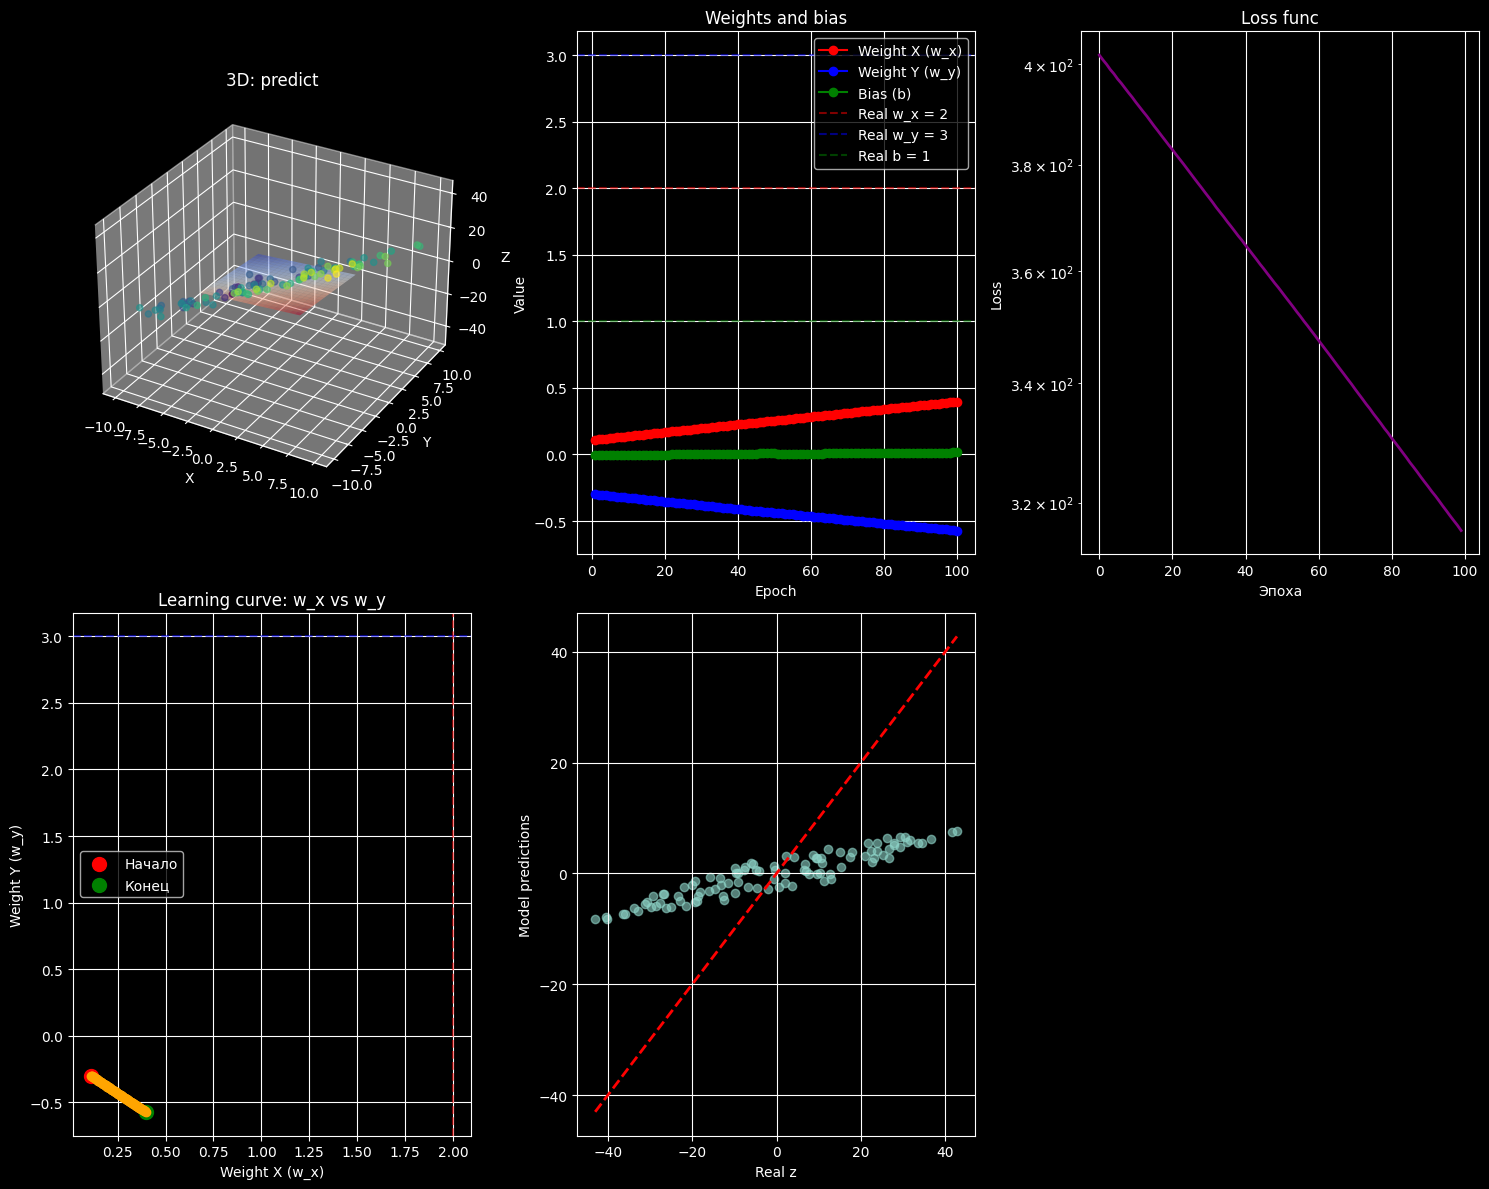


Model params:
Weight for X (w_x): 0.3964 (real: 3.0)
Weight for Y (w_y): -0.5715 (real: -2.0)
Bias (b): 0.0154 (real: 1.0)
Equation: z = 0.3964*x + -0.5715*y + 0.0154

Test input:
     X      Y    Prediction Z          Real Z      Error
------------------------------------------------------------
  10.0  -10.0          9.6940         51.0000    41.3060
   2.0    2.0         -0.3348          3.0000     3.3348
   0.0    0.0          0.0154          1.0000     0.9846
  -2.0   -2.0          0.3656         -1.0000     1.3656
 -10.0   10.0         -9.6633        -49.0000    39.3367


In [24]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(42)
n_samples = 100

x = np.random.uniform(-10, 10, n_samples)
y = np.random.uniform(-10, 10, n_samples)

def func_z(x, y):
    return 3 * x - 2 * y + 1

z_ideal = func_z(x, y)
noise = np.random.normal(0, 2, n_samples)
z = z_ideal + noise

model = tf.keras.Sequential([
    keras.layers.Dense(units=1, input_shape=[2])
])
model.compile(optimizer='adam', loss='mean_squared_error')


class GetWeights(tf.keras.callbacks.Callback):
    def __init__(self):
        super(GetWeights, self).__init__()
        self.epoch_weights_x = []
        self.epoch_weights_y = []
        self.epoch_biases = []
        self.loss_history = []

    def on_epoch_end(self, epoch, logs=None):
        weights = self.model.layers[0].get_weights()[0]
        bias = self.model.layers[0].get_weights()[1][0]

        self.epoch_weights_x.append(weights[0][0])
        self.epoch_weights_y.append(weights[1][0])
        self.epoch_biases.append(bias)
        self.loss_history.append(logs['loss'])

        print(
            f'Epoch {epoch + 1}: w_x = {weights[0][0]:.4f}, w_y = {weights[1][0]:.4f}, b = {bias:.4f}, loss = {logs["loss"]:.4f}')


gw = GetWeights()

X = np.column_stack((x, y))
history = model.fit(X, z, epochs=100, validation_split=0.2, callbacks=[gw], verbose=0)

plt.figure(figsize=(15, 12))

ax1 = plt.subplot(2, 3, 1, projection='3d')
ax1.scatter(x, y, z, alpha=0.6, c=z, cmap='viridis', label='Данные с шумом')

x_grid, y_grid = np.meshgrid(np.linspace(-5, 5, 20), np.linspace(-5, 5, 20))
z_pred_grid = model.predict(np.column_stack((x_grid.flatten(), y_grid.flatten()))).reshape(x_grid.shape)
ax1.plot_surface(x_grid, y_grid, z_pred_grid, alpha=0.5, cmap='coolwarm', label='Предсказанная плоскость')

ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_title('3D: predict')

plt.subplot(2, 3, 2)
epochs = range(1, len(gw.epoch_weights_x) + 1)
plt.plot(epochs, gw.epoch_weights_x, 'ro-', label='Weight X (w_x)')
plt.plot(epochs, gw.epoch_weights_y, 'bo-', label='Weight Y (w_y)')
plt.plot(epochs, gw.epoch_biases, 'go-', label='Bias (b)')
plt.axhline(y=2, color='r', linestyle='--', alpha=0.5, label='Real w_x = 2')
plt.axhline(y=3, color='b', linestyle='--', alpha=0.5, label='Real w_y = 3')
plt.axhline(y=1, color='g', linestyle='--', alpha=0.5, label='Real b = 1')
plt.title('Weights and bias')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

plt.subplot(2, 3, 3)
plt.plot(gw.loss_history, color='purple', linewidth=2)
plt.title('Loss func')
plt.xlabel('Эпоха')
plt.ylabel('Loss')
plt.grid(True)
plt.yscale('log')

plt.subplot(2, 3, 4)
plt.plot(gw.epoch_weights_x, gw.epoch_weights_y, 'o-', color='orange')
plt.scatter(gw.epoch_weights_x[0], gw.epoch_weights_y[0], color='red', s=100, label='Начало')
plt.scatter(gw.epoch_weights_x[-1], gw.epoch_weights_y[-1], color='green', s=100, label='Конец')
plt.axhline(y=3, color='b', linestyle='--', alpha=0.5)
plt.axvline(x=2, color='r', linestyle='--', alpha=0.5)
plt.title('Learning curve: w_x vs w_y')
plt.xlabel('Weight X (w_x)')
plt.ylabel('Weight Y (w_y)')
plt.legend()
plt.grid(True)

plt.subplot(2, 3, 5)
z_pred = model.predict(X)
plt.scatter(z_ideal, z_pred, alpha=0.6)
plt.plot([z_ideal.min(), z_ideal.max()], [z_ideal.min(), z_ideal.max()], 'r--', lw=2)
plt.xlabel('Real z')
plt.ylabel('Model predictions')
plt.grid(True)

plt.tight_layout()
plt.show()

final_weights = model.layers[0].get_weights()[0]
final_bias = model.layers[0].get_weights()[1][0]
print(f"\nModel params:")
print(f"Weight for X (w_x): {final_weights[0][0]:.4f} (real: 3.0)")
print(f"Weight for Y (w_y): {final_weights[1][0]:.4f} (real: -2.0)")
print(f"Bias (b): {final_bias:.4f} (real: 1.0)")
print(f"Equation: z = {final_weights[0][0]:.4f}*x + {final_weights[1][0]:.4f}*y + {final_bias:.4f}")

print("\n" + "=" * 60)
print("Test input:")
print("=" * 60)

new_points = [
    (10.0, -10.0),
    (2.0, 2.0),
    (0.0, 0.0),
    (-2.0, -2.0),
    (-10.0, 10.0)
]

print(f"{'X':>6} {'Y':>6} {'Prediction Z':>15} {'Real Z':>15} {'Error':>10}")
print("-" * 60)

for x_new, y_new in new_points:
    z_pred = model.predict(np.array([[x_new, y_new]]), verbose=0)[0][0]

    z_ideal_new = func_z(x_new, y_new)

    error = abs(z_pred - z_ideal_new)

    print(f"{x_new:6.1f} {y_new:6.1f} {z_pred:15.4f} {z_ideal_new:15.4f} {error:10.4f}")